In [2]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import glob
import os
import sklearn.cluster

In [3]:
path = 'C:/Users/benji/Desktop/statapp/heatmap2/'

In [4]:
def extract_vector(path): #on créer une fonction afi d'extraire des vecteurs de "features" pour chaque image
    liste = os.listdir(path) #permet de créer la liste des noms images présentes dans le dossier
    resnet_feature_list = []
    resnet_weights_path = None
    #resnet_weights_path = 'imagenet'
    my_model = tf.keras.Sequential() #on utilise un réseau de neuronnes de la bibliothèque Keras
    my_model.add(tf.keras.applications.ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path)) 
    #initialisation du réseau Resnet50 qui va servir de "features extracteur"

    for im in liste :
        image = path + im
        im = cv2.imread(image) #lecture de l'image
        im = cv2.resize(im,(224,224)) #resize de l'image pour que sa taille soit adaptée à la première couche du réseau
        
        img = tf.keras.applications.resnet50.preprocess_input(np.expand_dims(im.copy(), axis=0))
      
        resnet_feature = my_model.predict(img) #extraction des features
        
        resnet_feature_np = np.array(resnet_feature) 
        resnet_feature_list.append(resnet_feature_np.flatten())#création de la liste des features
        

    return np.array(resnet_feature_list)

In [4]:
def cluster_image(path): #on effectue ensuite un kmeans sur les features obtenues pour obtenir 2 cluster
    
    resnet_feature_list = extract_vector(path)
    kmeans = sklearn.cluster.KMeans(n_clusters=2, random_state=0).fit(resnet_feature_list)
    result = kmeans.labels_.tolist()
    liste = os.listdir(path)
    df = pd.DataFrame(
        {'Conducteur': liste,
         'Resultat': result})
    return df

In [5]:
df = cluster_image(path)

In [11]:
df.head()

,Conducteur,Resultat
0,1.png,1
1,10.png,0
2,100.png,1
3,1000.png,1
4,1001.png,1


In [6]:
df.to_csv('C:/Users/benji/Desktop/statapp/cluster_drivers3.csv' ,decimal=',')

In [6]:
resnet_feature_list = extract_vector(path)

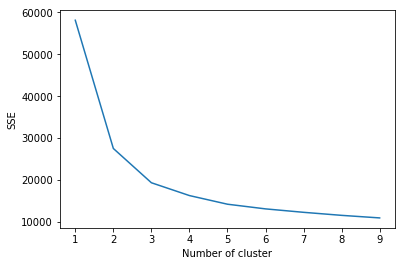

In [9]:

data = pd.DataFrame(resnet_feature_list)
sse = {}
for k in range(1, 10):
    kmeans = sklearn.cluster.KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
nom_fig ='C:/Users/benji/Desktop/statapp' +  '/' + 'kmeans' + '.png'
plt.savefig(nom_fig)

In [7]:
nom_fig ='C:/Users/benji/Desktop/statapp' +  '/' + 'kmeans' + '.png'
plt.savefig(nom_fig)

<Figure size 432x288 with 0 Axes>